# Проект №2 "Банки — Анализ оттока клиентов"

## Выполнил: Зюликов Олег Александрович

## 1. Общее описание проекта

В распоряжении имеются данные о клиентах банка, расположенного в Ярославле, Ростове Великом и Рыбинске. Каждый клиент характеризуется следующим набором данных:

|Признак|Описание признака|
|---:|:---|
|`userid`|идентификатор пользователя|
|`score`|баллы кредитного скоринга|
|`City`|город|
|`Gender`|пол|
|`Age`|возраст|
|`Objects`|количество объектов в собственности|
|`Balance`|баланс на счете|
|`Products`|количество продуктов, которыми пользуется клиент|
|`CreditCard`|есть ли кредитная карта|
|`Loyalty`|активный клиент|
|`estimated_salary`|заработная плата клиента|
|`Churn`|ушел или нет|

Заказчику проекта необходимо разработать меры по **удержанию клиентов**. Для этого ему необходимо иметь представление и том, какие клиенты склонны к оттоку. 

В связи с этим необходимо сформировать портреты клиентов, склонных к оттоку из банка.

## Инструкция по выполнению проекта

1. Общее описание проекта
2. Загрузка данных
3. Предобработка данных
 - 3.1 Корректировка заголовков признаков
 - 3.2 Анализ типов данных
 - 3.3 Описательные статистики
 - 3.4 Поиск дубликатов
 - 3.5 Анализ аномальных значений
 - 3.6 Восстановление пропущенных значений
 - 3.7 Визуализация данных после предобработки
4. Исследовательский анализ данных
 - 4.1 Изучение признаков по группам: интервальные признаки
 - 4.2 Гистограммы и распределения: интервальные признаки
 - 4.4 Корреляционный анализ
5. Проверка гипотез
 - Гипотезы по каждому признаку из портрета пользователя, склонного к оттоку.

## 2. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math

In [ ]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
pd.options.display.precision = 2
pd.options.display.float_format ='{:.2f}'.format

In [2]:
df = pd.read_csv('bank_dataset.csv')
df.head()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.tail()

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1
9999,15671055,792,Ярославль,Ж,28,4,130142.79,1,1,0,38190.78,0


## 3. Предобработка данных

### 3.1. Корректировка заголовков признаков

In [4]:
df.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn'],
      dtype='object')

In [5]:
df.columns = ['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn']

In [6]:
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [7]:
df

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


Изменили названия заголовков признаков.

### 3.2. Анализ типов данных

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 859.4+ KB


In [9]:
df.isnull().sum()

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
dtype: int64

В колонке признаков `balance` имеются пропущенные значения. Вернемся к ним позже.

### 3.3 Описательные статистики

In [10]:
df.describe()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.20
std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.40
min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00
25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.00
50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.00
75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.00
max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [11]:
df.groupby('churn').describe()

user_id                                                           \
        count        mean      std         min         25%         50%   
churn                                                                    
0     7963.00 15733903.88 71744.23 15608437.00 15671554.50 15734279.00   
1     2037.00 15732787.96 72692.62 15608442.00 15670096.00 15731699.00   

                                score                                     \
              75%         max   count   mean    std    min    25%    50%   
churn                                                                      
0     15796088.50 15858426.00 7963.00 651.85  95.65 405.00 585.00 653.00   
1     15795828.00 15858392.00 2037.00 645.35 100.32 350.00 578.00 646.00   

                        age                                           objects  \
         75%    max   count  mean   std   min   25%   50%   75%   max   count   
churn                                                                           
0     718.00 850.00 7963.00 37.41 10.13 18.00 31.00 36.00 41.00 92.00 7963.00   
1     716.00 850.00 2037.00 44.84  9.76 18.00 38.00 45.00 51.00 84.00 2037.00   

                                          balance                              \
      mean  std  min  25%  50%  75%   max   count      mean      std      min   
churn                                                                           
0     5.03 2.88 0.00 3.00 5.00 7.00 10.00 4846.00 119535.86 29944.93 14262.80   
1     4.93 2.94 0.00 2.00 5.00 8.00 10.00 1537.00 120746.97 30555.19  3768.69   

                                              products                      \
            25%       50%       75%       max    count mean  std  min  25%   
churn                                                                        
0      99118.23 119791.21 139747.40 221532.80  7963.00 1.54 0.51 1.00 1.00   
1     103700.69 119948.09 137986.58 250898.09  2037.00 1.48 0.80 1.00 1.00   

                     credit_card                                    loyalty  \
       50%  75%  max       count mean  std  min  25%  50%  75%  max   count   
churn                                                                         
0     2.00 2.00 3.00     7963.00 0.71 0.46 0.00 0.00 1.00 1.00 1.00 7963.00   
1     1.00 2.00 4.00     2037.00 0.70 0.46 0.00 0.00 1.00 1.00 1.00 2037.00   

                                         estimated_salary                     \
      mean  std  min  25%  50%  75%  max            count      mean      std   
churn                                                                          
0     0.55 0.50 0.00 0.00 1.00 1.00 1.00          7963.00  99738.39 57405.59   
1     0.36 0.48 0.00 0.00 0.00 1.00 1.00          2037.00 101465.68 57912.42   

                                                    
        min      25%       50%       75%       max  
churn                                               
0     90.07 50783.49  99645.04 148609.96 199992.48  
1     11.58 51907.72 102460.84 152422.91 199808.10

Явно прослеживается, что с признаком `estimated_salary` что-то не так. Минимальная заработная плата не может быть 11,58.

### 3.4. Поиск дубликатов

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop('user_id', axis=1).duplicated().sum()

0

В нашем датафрейме нет дублирующих записей, как с колонкой признаков `user_id`, так и при её исключении.

### 3.5 Анализ аномальных значений

Разделим наши признаки на категориальные и интервальные и обработаем их отдельно друг от друга.

**Анализ категориальных признаков**

In [14]:
cat_var = ['city', 'gender', 'loyalty', 'churn', 'objects', 'products', 'credit_card']

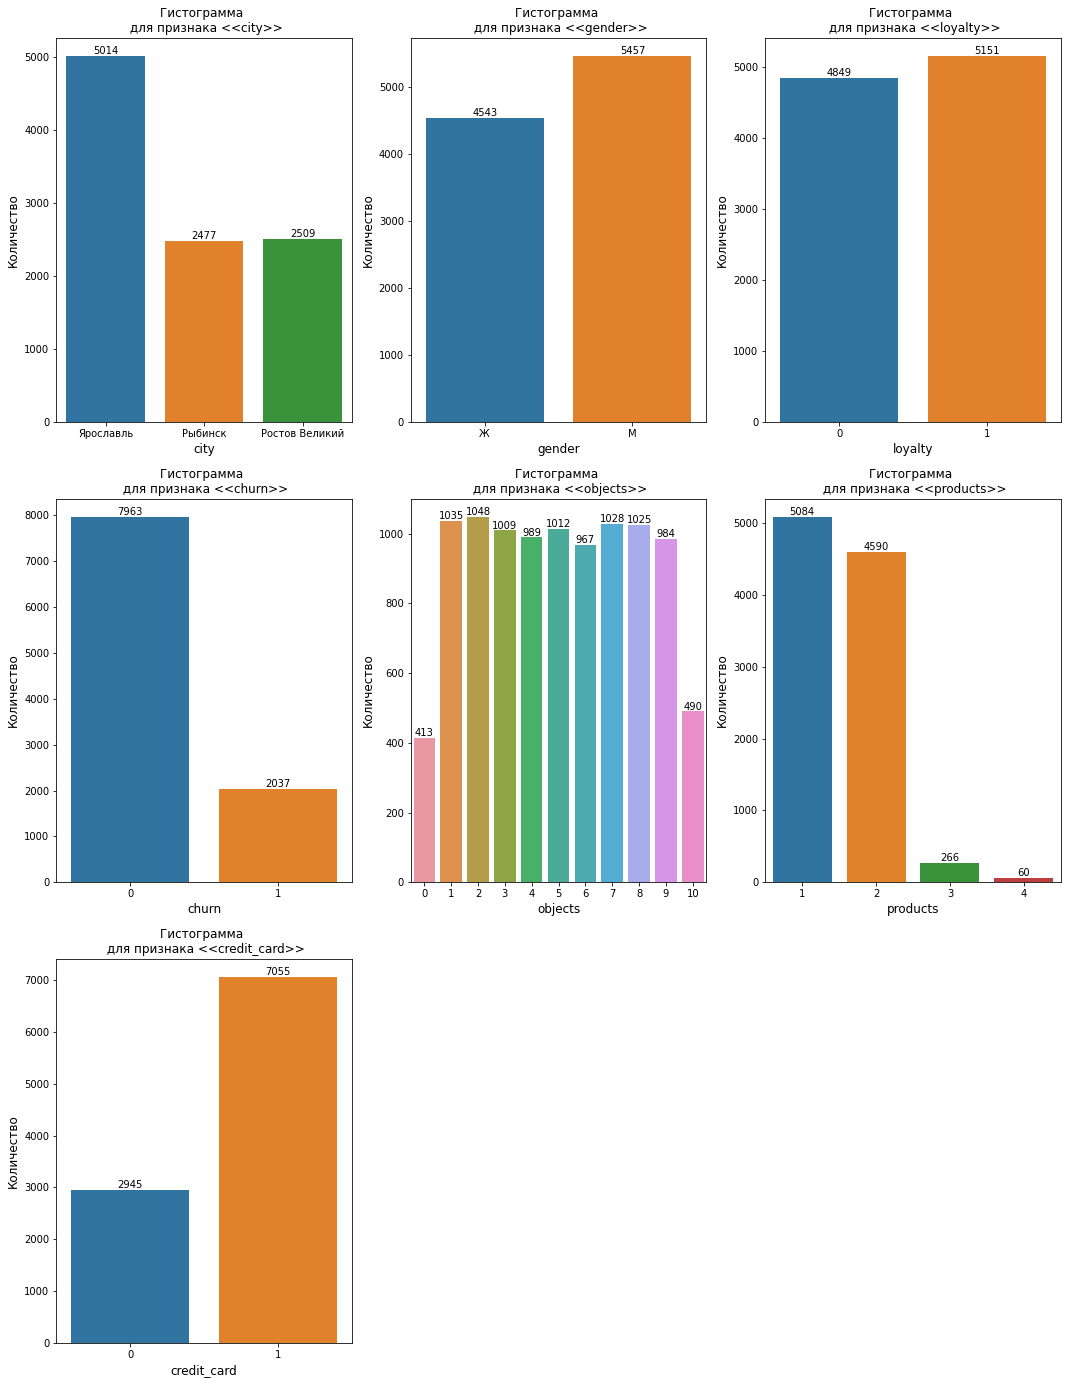

In [15]:
fig, axes = plt.subplots(3, sharey=True, figsize=(18,24))
for i, col in enumerate(cat_var):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=col, data=df,)
    plt.title("Гистограмма \n для признака <<{}>>".format(col))
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

Вывод по категориальным признакам:
-  исследуемые признаки корректны,
- примерно половина клиентов банка проживает в Ярославле, четверть - в Ростове и еще четветрь в Рыбинске,
- мужчин в выборке немногим больше, чем женщин,
- активных клиентов чуть больше половины,
- отток клиентов составляет около 20%,
- у клиентов банка большое количество объектов в собственности - в среднем 5,
- подавляющее большинство клиентов пользуются максимум двумя продуктами банка,
- около 70% клиентов владеют кредитной картой.

**Анализ интервальных признаков**

In [16]:
int_var = ['score', 'age', 'balance', 'estimated_salary']

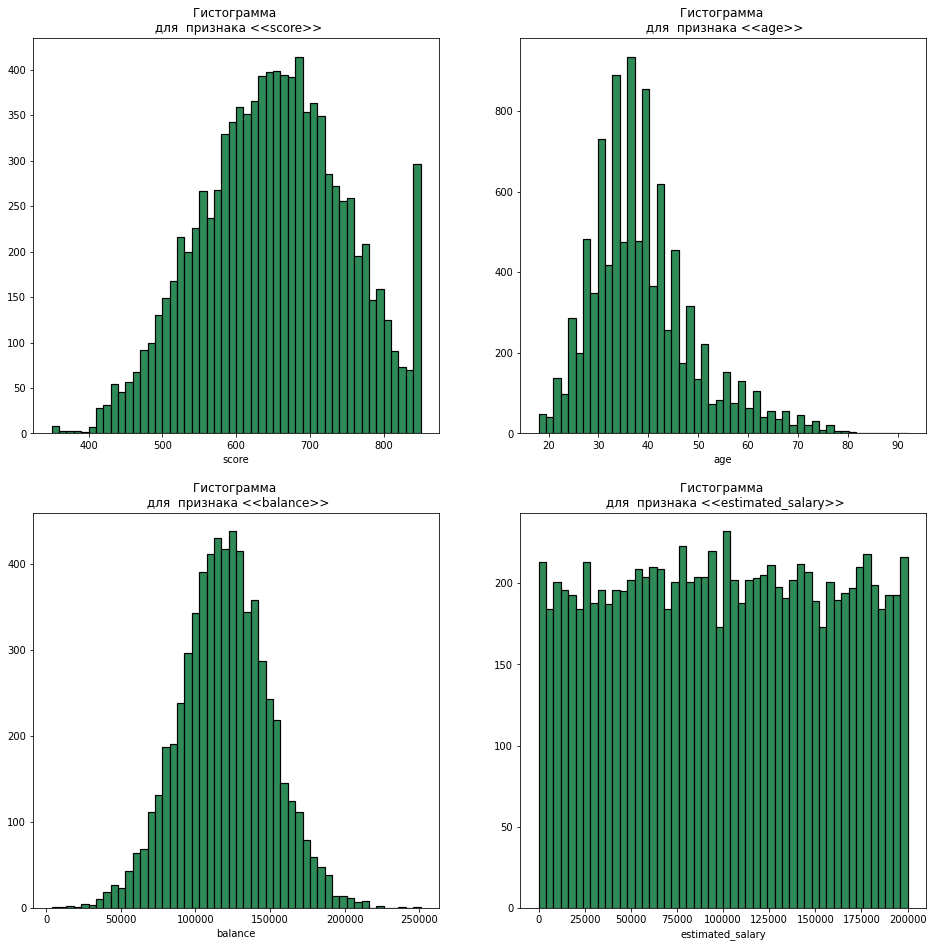

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16))
l = 0
for i in range(2):
    for j in range(2):
        axes[i, j].hist(df[int_var[l]], bins = 50, color = "seagreen", edgecolor='black', linewidth=1.2)
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(int_var[l]))
        axes[i, j].set_xlabel(int_var[l])
        l+=1

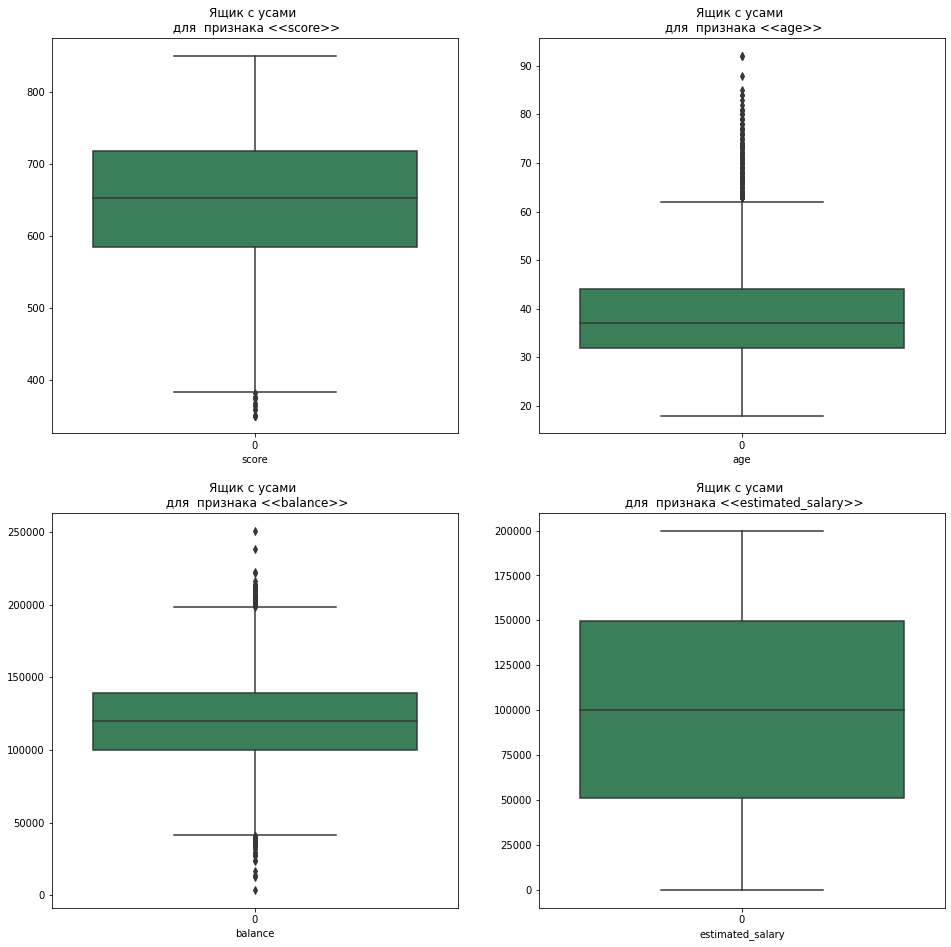

In [18]:
fig, axes = plt.subplots(2, sharey=True, figsize=(16,16))
for i, col in enumerate(int_var):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df[col], whis = 1.5, color = "seagreen")
    plt.title("Ящик с усами \n для  признака <<{}>>".format(col))
    plt.xlabel(col)

После анализа графиков, можно сделать вывод, что аномальными значениями можно считать следующие показатели:
- для признака `score`: значения меньше 380 и больше 840,
- для признака `age`: значения больше 62,
- для признака `balance` значения меньше 45000 и больше 200000.

Сформируем датасет, который не будет содержать этих записей с аномальными значениями (здесь надо быть аккуратными, поскольку признак `balance` имеет 3617 пропущенных значений, и здесь важно не удалить эти запси вместе с аномалиями):

In [19]:
df_no_anom = df.drop(df[(df.score < 380) | (df.score > 840) | (df.age > 62) |
                        (df.balance < 45000) | (df.balance > 200000)].index)
df_no_anom.shape[0]

9272

Поскольку записей с аномалиями оказалось всего около 7% от первоначального датасета, в дальнейшем мы будет работать с новым датасетом без аномалий.

Также создадим новый датафрейм, в котором будут только записи с пропущенными значениями по признаку `balance`.

In [20]:
df_nan = df_no_anom.drop(df_no_anom[df_no_anom.balance > 0].index)
df_nan

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,15632065,775,Ярославль,М,30,4,NaN,2,1,0,49337.84,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


### 3.6 Восстановление пропущенных значений

Поскольку пропущенные значения есть только в признаке `balance` и их довольно много - около 36%, то мы, во избежание искажения данных, восстанавливать их не будем.

### 3.7 Визуализация данных после предобработки

Визуализируем новый датасет, который не содержит аномальных значений.

**Категориальные признаки**

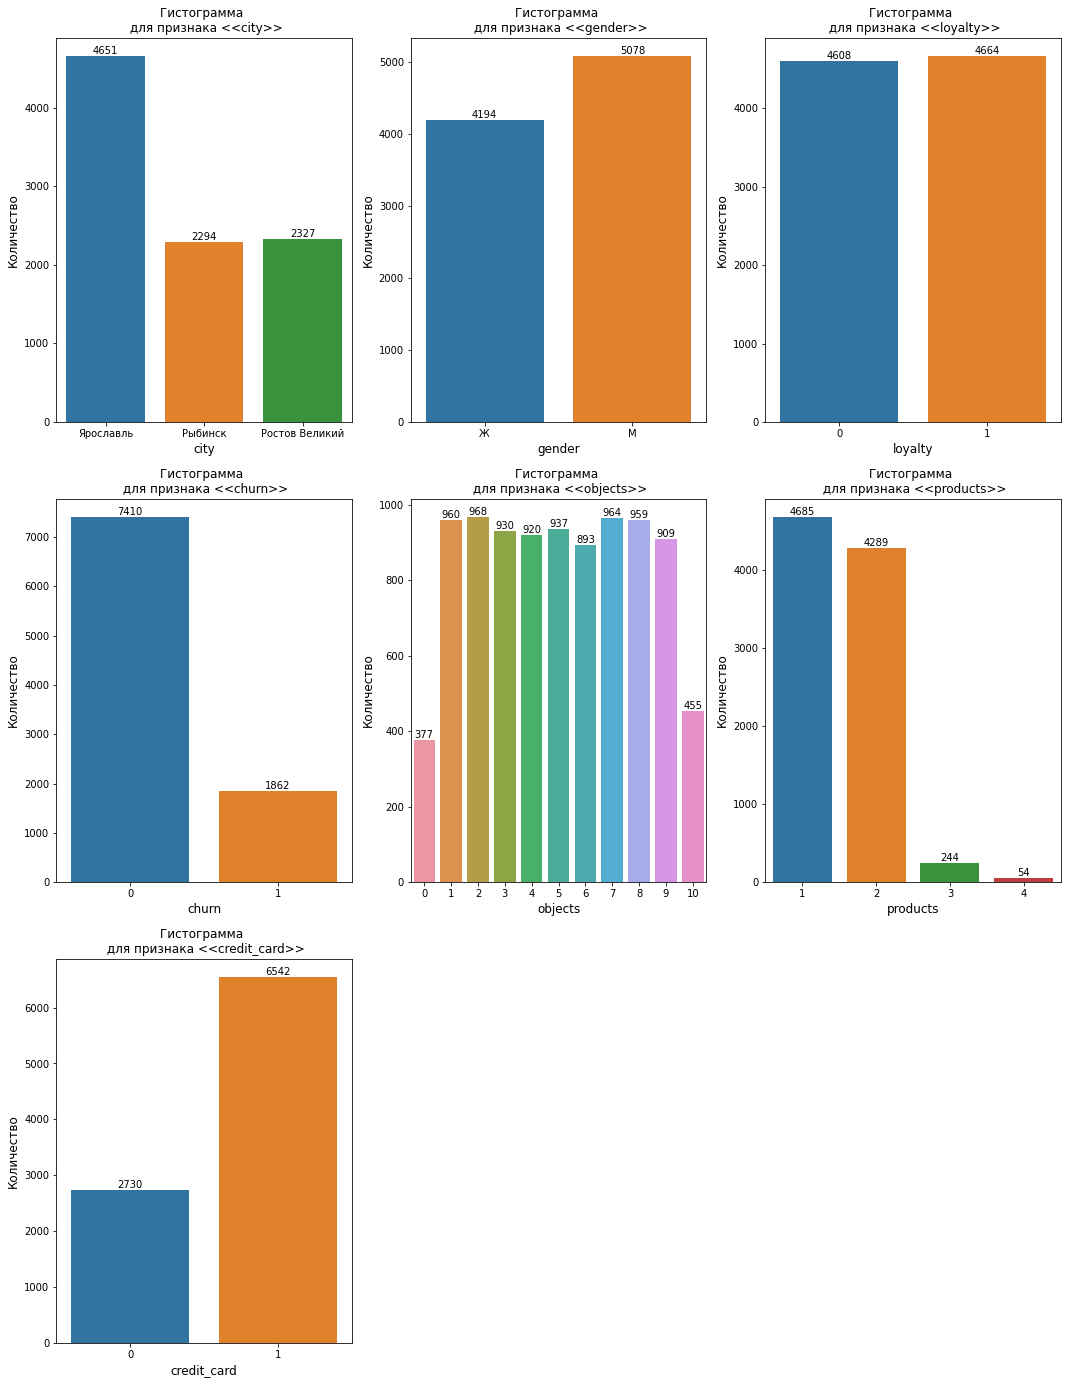

In [21]:
fig, axes = plt.subplots(3, sharey=True, figsize=(18,24))
for i, col in enumerate(cat_var):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=col, data=df_no_anom,)
    plt.title("Гистограмма \n для признака <<{}>>".format(col))
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

**Интервальные признаки**

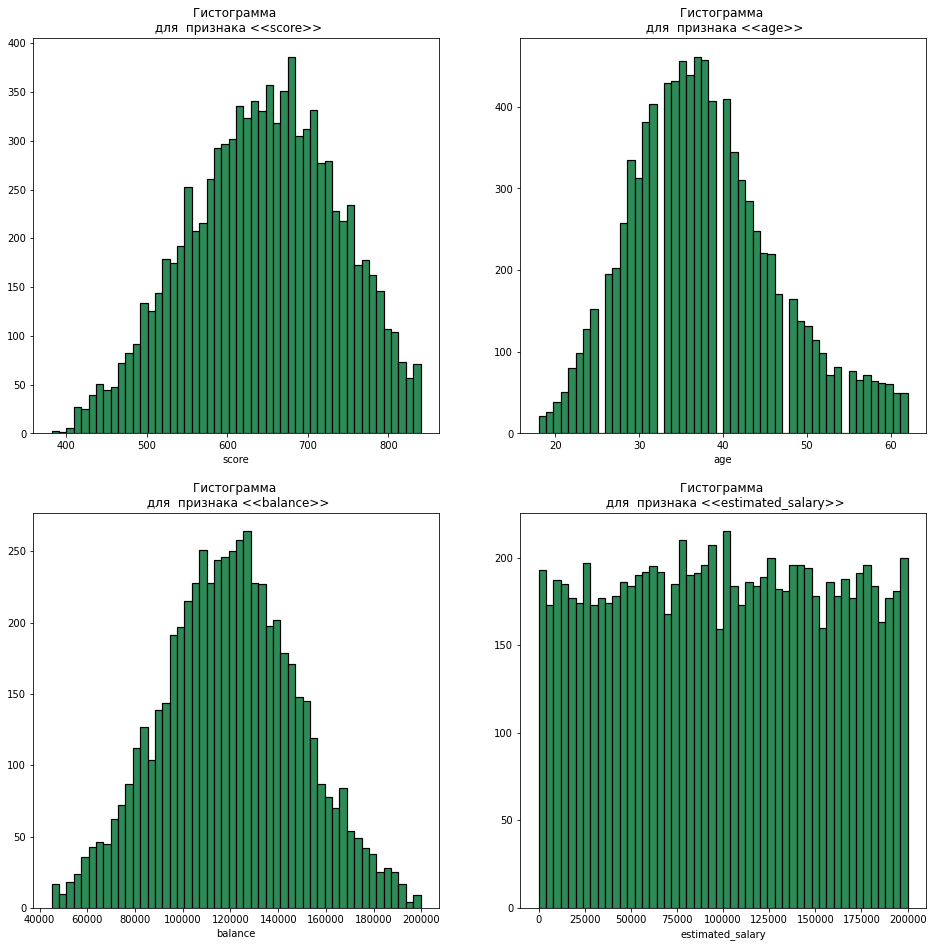

In [22]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16))
l = 0
for i in range(2):
    for j in range(2):
        axes[i, j].hist(df_no_anom[int_var[l]], bins = 50, color = "seagreen", edgecolor='black', linewidth=1.2)
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(int_var[l]))
        axes[i, j].set_xlabel(int_var[l])
        l+=1

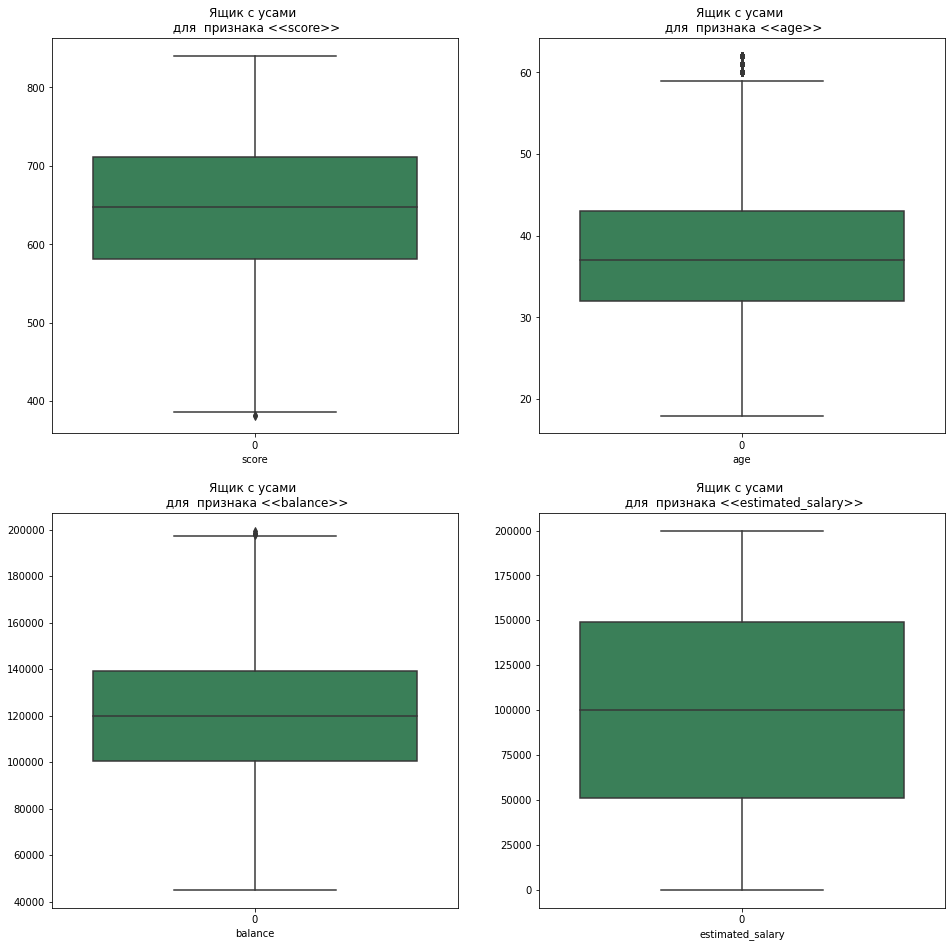

In [23]:
fig, axes = plt.subplots(2, sharey=True, figsize=(16,16))
for i, col in enumerate(int_var):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df_no_anom[col], whis = 1.5, color = "seagreen")
    plt.title("Ящик с усами \n для  признака <<{}>>".format(col))
    plt.xlabel(col)

Визуально в графиках до обработки и после значительных изменений не наблюдается.

**Отдельно визуализируем датафрейм с записями с пропущенными значениями признака `balance`.**

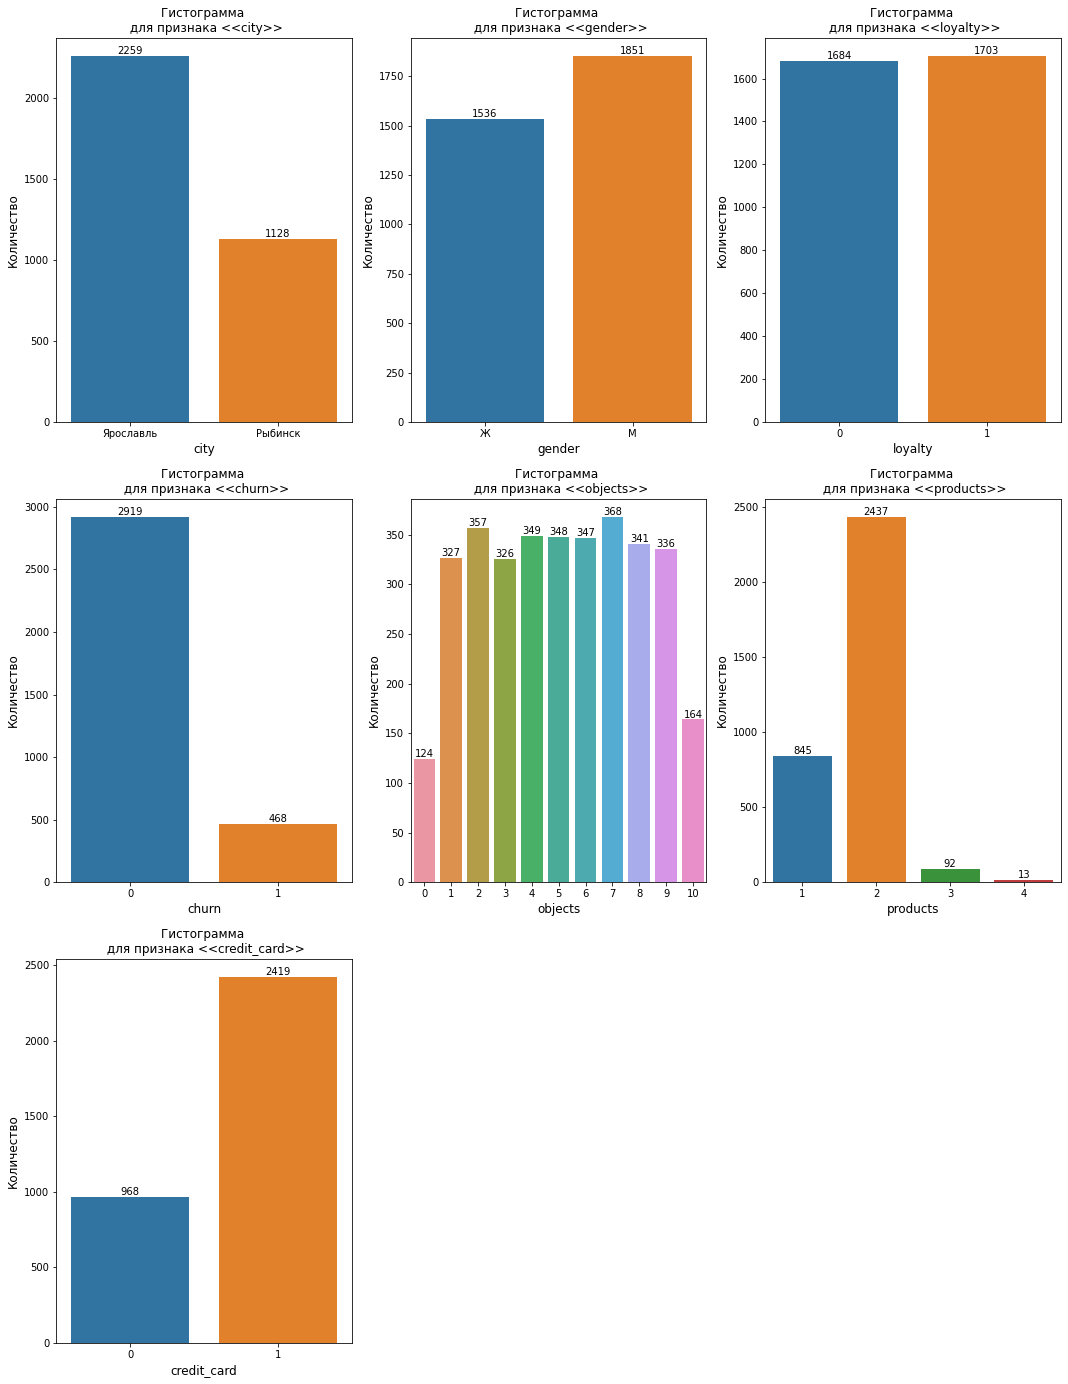

In [24]:
fig, axes = plt.subplots(3, sharey=True, figsize=(18,24))
for i, col in enumerate(cat_var):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x=col, data=df_nan,)
    plt.title("Гистограмма \n для признака <<{}>>".format(col))
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Количество', fontsize = 12)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:d}'.format(p.get_height()), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

In [25]:
int_var_2 = ['score', 'age', 'estimated_salary']

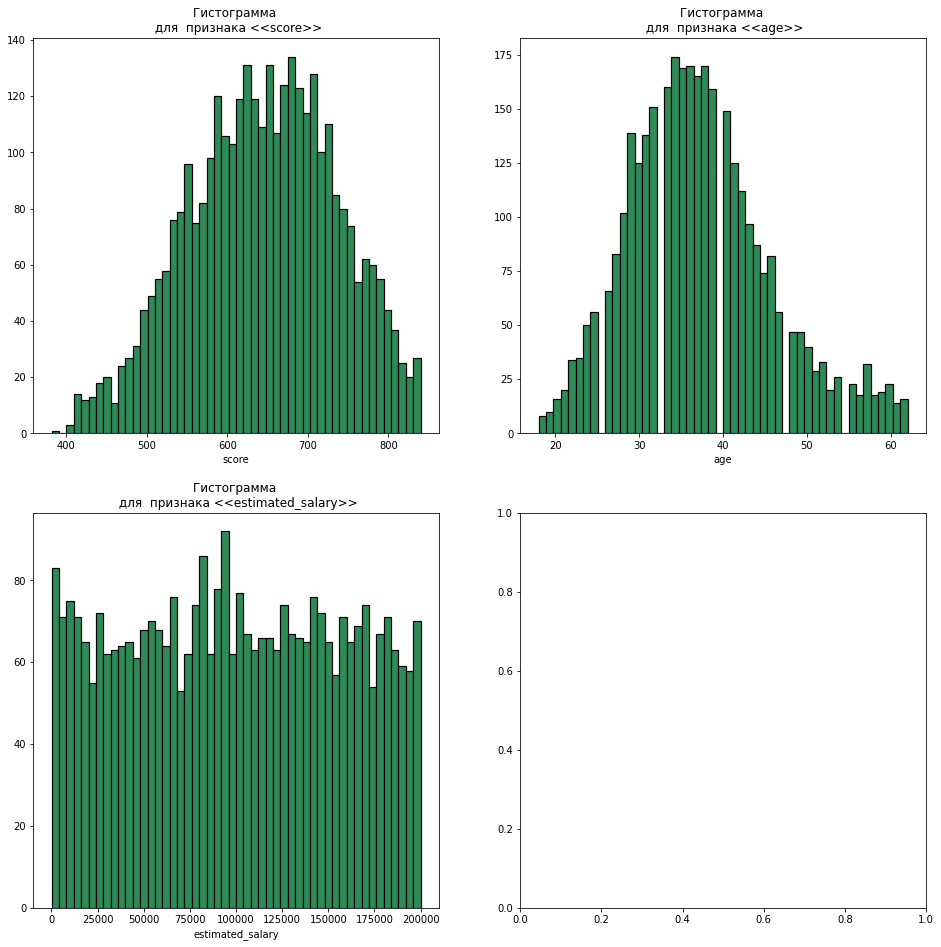

In [26]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(16,16))
l = 0
for i in range(2):
    for j in range(2):
        if (i == 1 & j == 1):
            break
        axes[i, j].hist(df_nan[int_var_2[l]], bins = 50, color = "seagreen", edgecolor='black', linewidth=1.2)
        axes[i, j].set_title("Гистограмма \n для  признака <<{}>>".format(int_var_2[l]))
        axes[i, j].set_xlabel(int_var_2[l])
        l+=1

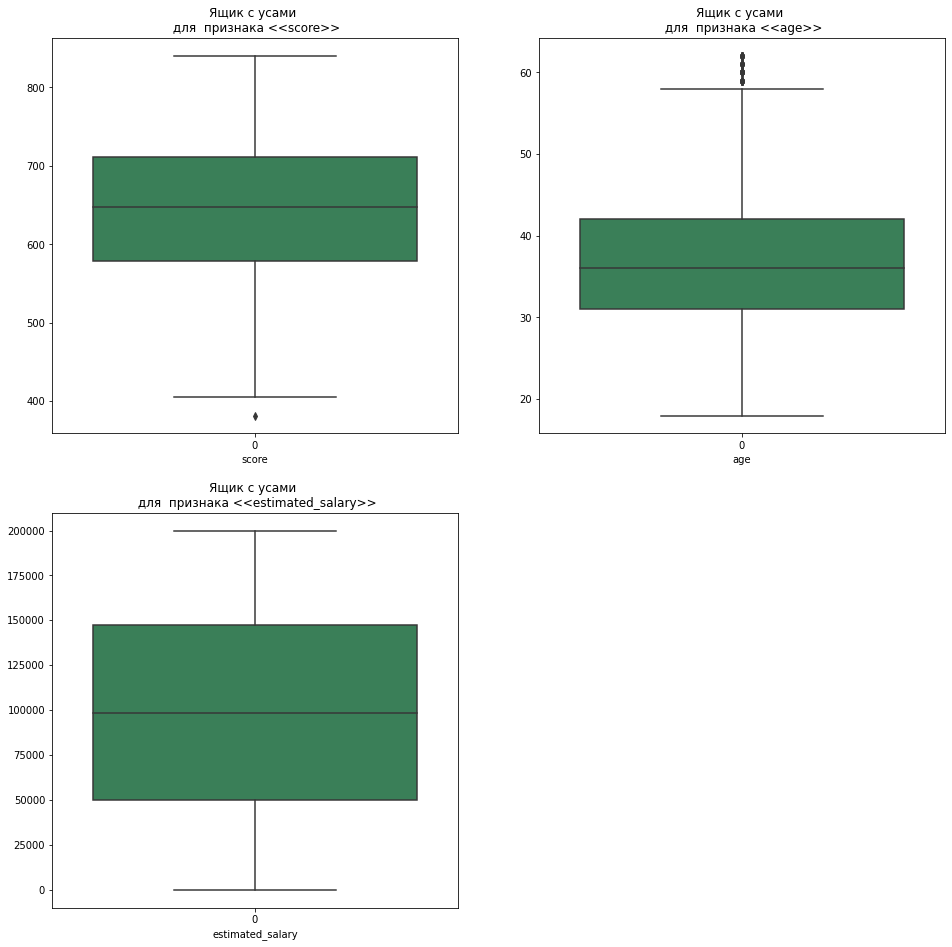

In [27]:
fig, axes = plt.subplots(2, sharey=True, figsize=(16,16))
for i, col in enumerate(int_var_2):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=df_nan[col], whis = 1.5, color = "seagreen")
    plt.title("Ящик с усами \n для  признака <<{}>>".format(col))
    plt.xlabel(col)

Визуально в графиках основного датасета и датасета с пропущенными значениями признака `balance` не наблюдается, за исключением гистограмы для признака `city`, по которой мы видим, что в Ростове Великом не было ни одной записи с пропущенным признаком. Поэтому в дальнейшем мы будет работать только с одним датасетом `df_no_anom`, который включает в том числе записи с пропущенными значениями признака `balance`.

**Вывод по предобработке данных**

На данном этапе проведены следующие действия:
- исправлены заголовки признаков: заголовки признаков приведены к нижнему регистру;
- исследованы типы признаков: типы данных соответствуют содержательному смыслу;
- изучены признаки, исходя из значений описательных статистик;
- проведен поиск дубликатов: дублирующих записей не обнаружено;
- проведен анализ аномальных наблюдений: обнаружены некоторые выбросы, сформирован датафрейм без аномальных записей;
- проведен анализ пропущенных значений: пропуски содержатся только в признаке `balance`, выявлено, что пропуски не оказывают существенного влияния на общую картину.

После этого этапа данные подготовлены для дальнейшего анализа.

## 4. Исследовательский анализ данных

### 4.1 Изучение признаков по группам

**Интервальные признаки**

Для интервальных признаков исследуем средние по группам, в качестве оценок средних воспользуемся `выборочным средним` и `медианой`.

In [28]:
df_mean = df_no_anom.loc[:, df_no_anom.columns != 'user_id'].groupby('churn')[int_var].agg('mean').T
df_median = df_no_anom.loc[:, df_no_anom.columns != 'user_id'].groupby('churn')[int_var].agg('median').T

In [29]:
df_temp = pd.concat([df_mean, df_median], axis = 1)
df_temp.columns = ['Выборочное_среднее_для_оставшихся',
                   'Выборочное_среднее_для_ушедших',
                  'Медиана_для_оставшихся',
                  'Медиана_для_ушедших'] 

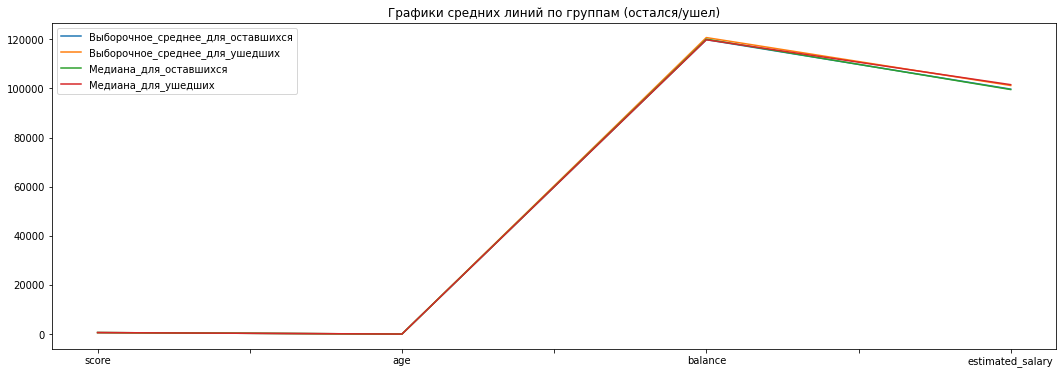

In [30]:
df_temp.plot(kind='line', figsize=(18,6), title='Графики средних линий по группам (остался/ушел)');

In [31]:
df_temp

,Выборочное_среднее_для_оставшихся,Выборочное_среднее_для_ушедших,Медиана_для_оставшихся,Медиана_для_ушедших
score,645.63,641.77,649.00,644.00
age,36.22,44.03,36.00,44.00
balance,119866.31,120726.84,120074.97,119834.67
estimated_salary,99745.69,101211.58,99565.48,101556.32


Самые существенные различия выявлены в признаке `age`. В признаках `score` и `estimated_salary` тоже есть небольшие различия в значениях. По признаку `balance` особых различий не выявлено.

**Категориальные признаки**

Прежде, чем переходить к анализу подвергнем модификации набор категориальных признаков, убрав из него признак `churn`.

In [32]:
cat_var = list(set(cat_var) - set(['churn']))
cat_var

['gender', 'credit_card', 'objects', 'loyalty', 'city', 'products']

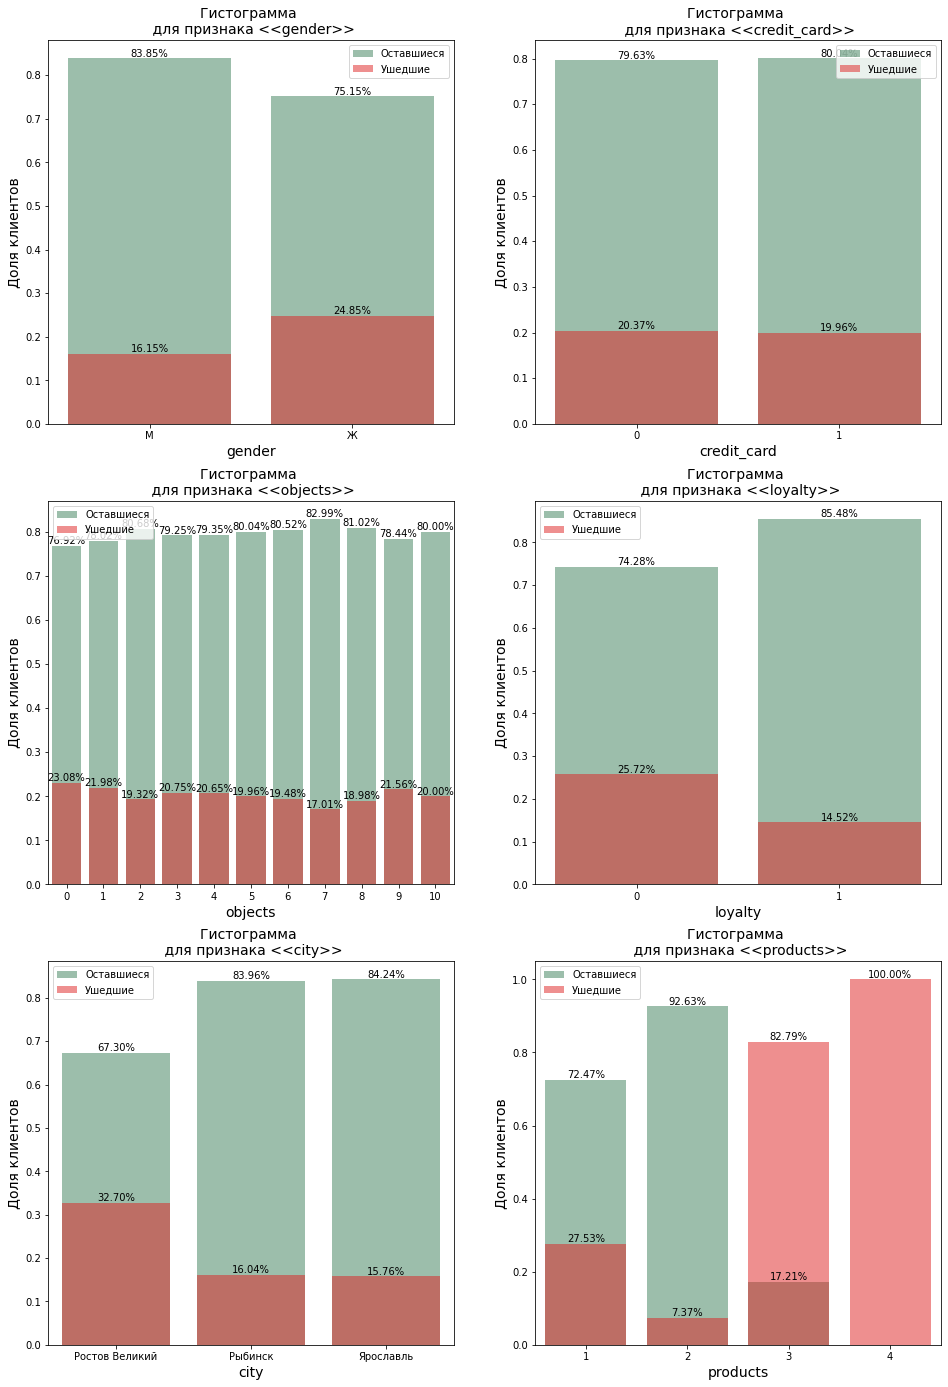

In [33]:
fig, axes = plt.subplots(3, figsize=(16,24))
for i, col in enumerate(cat_var):
    plt.subplot(3,2,i+1)
    data_all = df_no_anom[col].value_counts()
    r = (pd.DataFrame([df_no_anom[df_no_anom.churn == 0][col].value_counts()/data_all, 
              df_no_anom[df_no_anom.churn == 1][col].value_counts()/data_all]).T)
    r.columns = ['0','1']
    ax1 = sns.barplot(x = r.index, y = r['0'], data = r, color='seagreen',
                      alpha = 0.5, label = 'Оставшиеся')
    ax2 = sns.barplot(x = r.index, y = r['1'], data = r, color='red', 
                      alpha = 0.5, label = 'Ушедшие')
    plt.title("Гистограмма \n для признака <<{}>>".format(col), fontsize = 14)
    plt.xlabel(col, fontsize = 14)
    plt.ylabel('Доля клиентов', fontsize = 14)
    plt.legend()
    for p in ax1.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax1.annotate('{:.2f}%'.format(100*y), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

Проведем анализ построенных гистограмм для категориальных признаков:
- по признаку `city` наблюдаются различия: клиенты из Ростова Великого склонны к оттоку;
- по признаку `gender` наблюдаются различия: женщины склонны к оттоку;
- по признакам `objects` и `credit_card` различий не замечено;
- по признаку `products` к оттоку склонны клиенты с одним, тремя и четырьмя продуктами, но руководствуясь здравым смыслом и тем, что клиентов с 3 или 4 банковскими продуктами во всей выборке всего 326 или 0.0326%, предположим, что к оттоку склонны клиенты с одним банковским продуктом;
- по признаку `loyalty` наблюдаются различия: неактивные клиенты более склонны к оттоку, чем активные.

### 4.2 Гистограммы и распределения: интервальные признаки

c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\admin\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

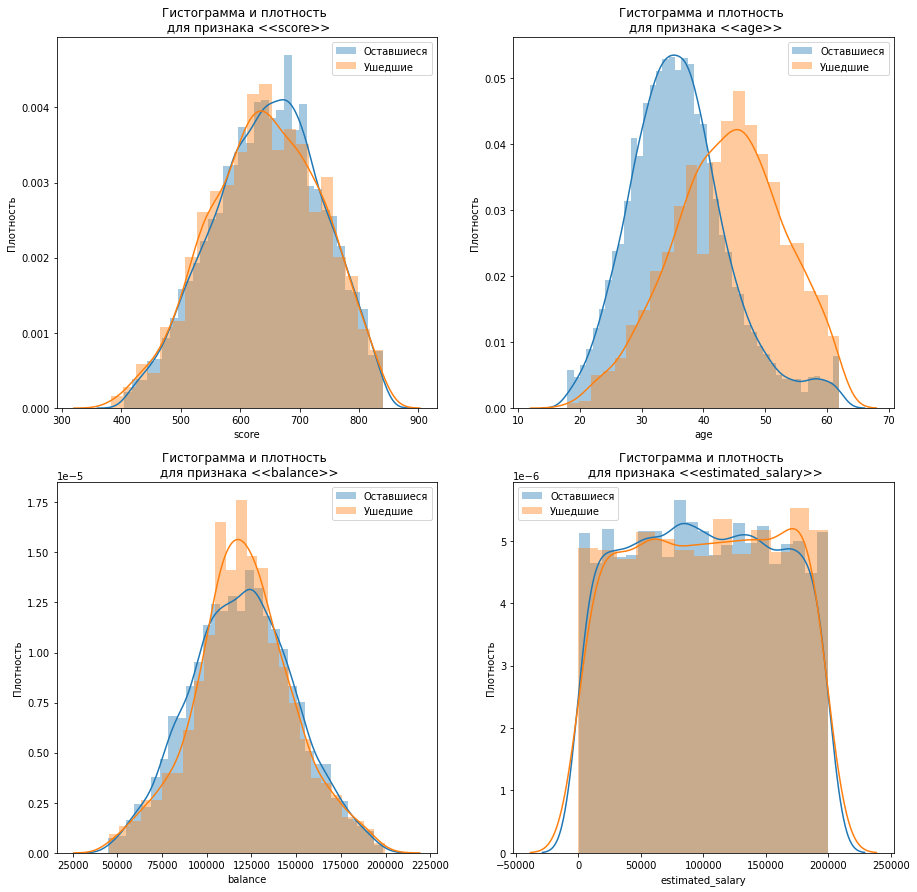

In [34]:
fig, axes = plt.subplots(2, sharey=True, figsize=(15,15))
for i, col in enumerate(int_var):
    plt.subplot(2,2,i+1)
    ax = sns.distplot(df_no_anom[df_no_anom.churn == 0][col], label = 'Оставшиеся', )
    ax = sns.distplot(df_no_anom[df_no_anom.churn == 1][col], label = 'Ушедшие')
    plt.title("Гистограмма и плотность \n для признака <<{}>>".format(col))
    plt.xlabel(col)
    plt.ylabel('Плотность')
    plt.legend()

Проведем анализ построенных гистограмм для категориальных признаков:
- визуальная оценка построенных графиков позволяет сделать вывод о том, что имеется статистически значимое различие между средним значением признака `age` оставшихся и ушедших клиентов;
- по признакам `score`, `balance` и `estimated_salary` такого вывода мы сделать не можем, так как визуальное отражение этих признаков на графиках очень схоже, как для ушедших клиентов, так и для оставшихся.

### 4.3 Корреляционный анализ

Для исследуемого признакового пространства рассчитаем матрицу корреляций.

Поскольку признаки `city` и `gender` представляют собой строковый тип данных, преобразуем их в количественный тип данных. Для преобразования воспользуемся методом `.get_dummies`.

Так же исключим из рассмотрения признак user_id, так как в данной ситуации он не несет никакой информационной нагрузки.

In [36]:
df_cor = pd.get_dummies(df_no_anom)
df_cor.drop('user_id', axis = 1, inplace = True)
df_cor

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,NaN,2,1,0,96270.64,0,0,0,1,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,1
9997,709,36,7,NaN,1,0,1,42085.58,1,0,0,1,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1


Переименуем новые признаки, приведем их к аналогичному, рассматриваемым ранее признакам, виду.

In [39]:
df_cor.rename(columns = {'city_Ростов Великий':'city_rostov', 
                      'city_Рыбинск':'city_rybinsk', 
                      'city_Ярославль':'city_yaroslavl', 
                      'gender_Ж':'gender_w', 
                      'gender_М':'gender_m'}, inplace = True);
df_cor

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_rostov,city_rybinsk,city_yaroslavl,gender_w,gender_m
0,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,NaN,2,1,0,96270.64,0,0,0,1,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,1
9997,709,36,7,NaN,1,0,1,42085.58,1,0,0,1,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1


Построим матрицу корреляций:

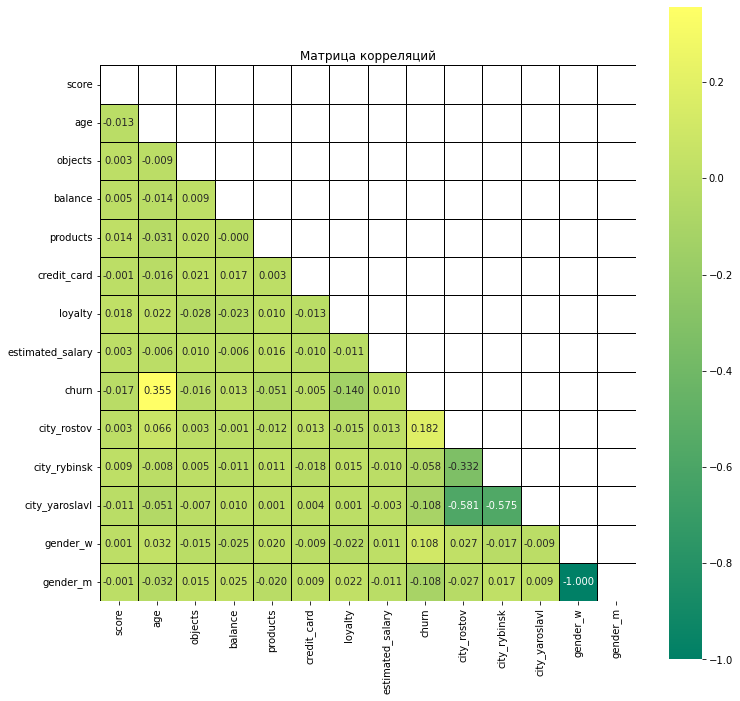

In [40]:
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data = df_cor.corr(), annot=True, square=True, 
            cmap='summer', fmt='.3f', linewidths=1, linecolor='black', mask=np.triu(df_cor.corr()))
plt.title('Матрица корреляций')
plt.show()

**Вывод по матрице корреляций**

Признак `churn` имеет наибольший положительный коэффициент корреляции с признаком `age`. Это означает, что чем больше значение признака `age`, то есть чем старше клиент, тем больше значение признака `churn` (стремится к 1), а значит тем больше склонность клиента к уходу из банка. Данный результат косвенно подтверждает выдвинутую выше гипотезу о том, что имеется статистически значимое различие между средним значением признака `age` оставшихся и ушедших клиентов.

Отметим также признаки `loyalty`, `city_yaroslavl` и `gender_m`. Эти признаки имеют отрицательные коэффициенты корреляции с целевым признаком `churn`. То есть, чем больше значение этого признака, тем более вероятно, что клиент останется.

Для признака `churn` из оставшихся положительных значений выделим также коэффициенты корреляции с признаками `city_rostov` и `gender_w`.

**Промежуточный вывод**

На данном этапе проекта выявлялись признаки, значения которых были бы наиболее характерны для клиентов, склонных к оттоку. Для поиска данных признаков применены методы анализа по группам описательных статистик, визуальный анализ гистограмм и распределений, разведочный анализ данных, а также методы корреляционного анализа.

В результате установлено, что значения признаков `age`, `loyalty`, `gender` и `city` определяют склонность клиента к оттоку.